<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('C:/Users/laiis/OneDrive/Documentos/Cursos/Coursera/Statistics_with_Python_IBM/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Data Wrangling 

In [3]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [4]:
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

All data is numerical. I'll drop the column `Unnamed: 0` because it's empty

In [6]:
boston_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
boston_df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

No missing values were found in the dataset, so the data is ready for analysis.

# Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a **boxplot**

- Provide a **bar plot** for the Charles river variable

- Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

- Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

- Create a **histogram** for the pupil to teacher ratio variable

### 2.1 Boxplot for "Median value of owner-occupied homes

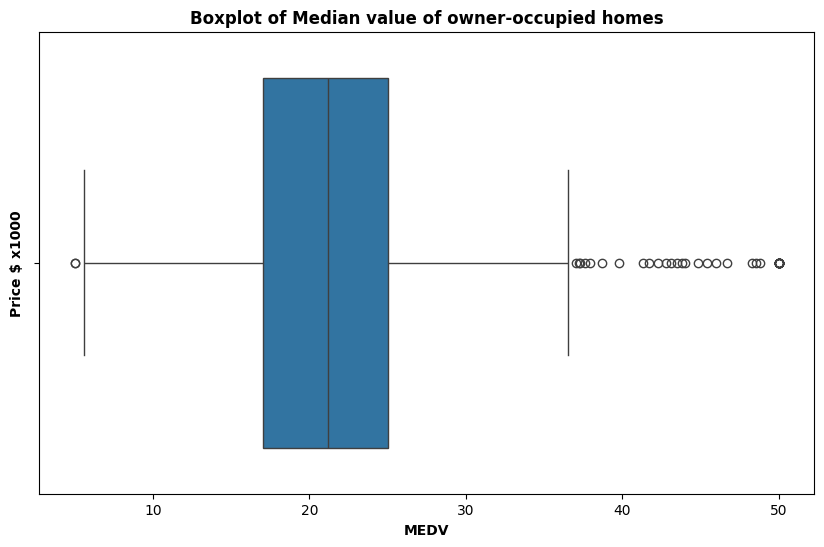

In [11]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median value of owner-occupied homes', weight='bold')
plt.ylabel('Price $ x1000', weight='bold')
plt.xlabel('MEDV', weight='bold')
plt.show()

From the boxplot, we can observe the following:

* The median value of owner-occupied homes is around $20,000. This indicates that the data is probably from around 1970. The median home value illustrates typical housing costs during that period, which are considerably lower compared to current market prices due to inflation and market growth.

* The majority of the housing prices range from approximately $15,000 to $25,000. There's moderate variability in home values, capturing the central 50% of the data. This range suggests that most homes were valued within this bracket, reflecting a relatively stable market segment.

* Numerous high-value outliers (up to $50,000) point to the presence of more expensive properties.

The data reveals economic diversity within Boston’s housing market, highlighting disparities between different neighborhoods. The presence of high-value outliers suggests significant wealth in certain areas, while the central range shows more typical housing conditions for the majority of residents.

### 2.2 Bar Plot for the Charles River Variable

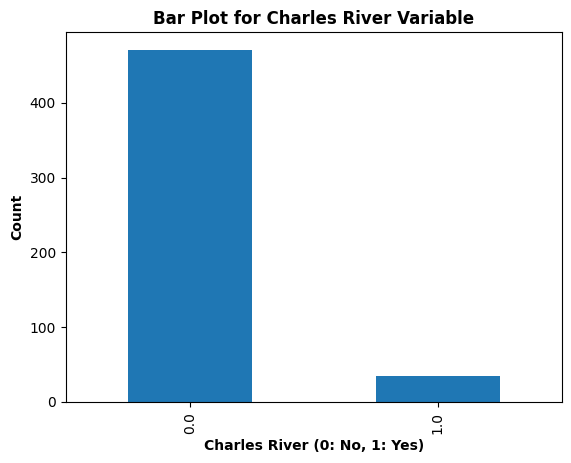

In [12]:
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar Plot for Charles River Variable', weight='bold')
plt.xlabel('Charles River (0: No, 1: Yes)', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()


* The overwhelming majority of tracts do not bound the Charles River, as indicated by the significantly taller bar at 0.0. This suggests that only a small portion of the housing data involves properties near the river.

* The count of non-river-bounding tracts (0) is over 450, while the count of river-bounding tracts (1) is under 50. This stark contrast highlights the relative scarcity of properties directly adjacent to the Charles River.

### 2.3 Boxplot for MEDV vs. AGE (Discretized)

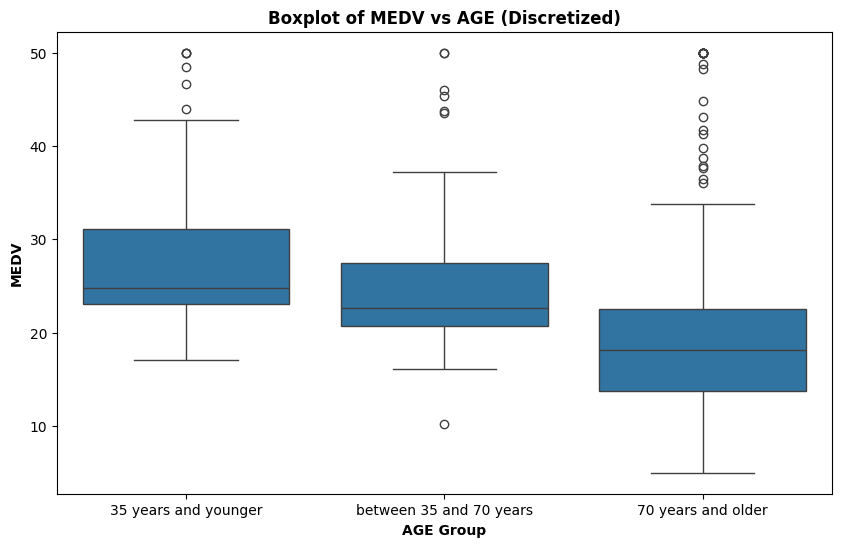

In [13]:
# Discretize the AGE variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Generate the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'])
plt.title('Boxplot of MEDV vs AGE (Discretized)', weight='bold')
plt.xlabel('AGE Group', weight='bold')
plt.ylabel('MEDV', weight='bold')
plt.show()

The median of city areas home median prices decreases with an increasing proportion of old houses. Which seems normal.

Nevertheless, all three groups have numerous outliers, with values extending up to $50,000. This indicates that regardless of the age group, there are high-value homes. The [70, max] group has the most outliers, suggesting that while most older homes have lower values, some are still highly valued maybe due to historical significance.

### 2.4 Scatter Plot for Nitric Oxide vs. Non-Retail Business Acres

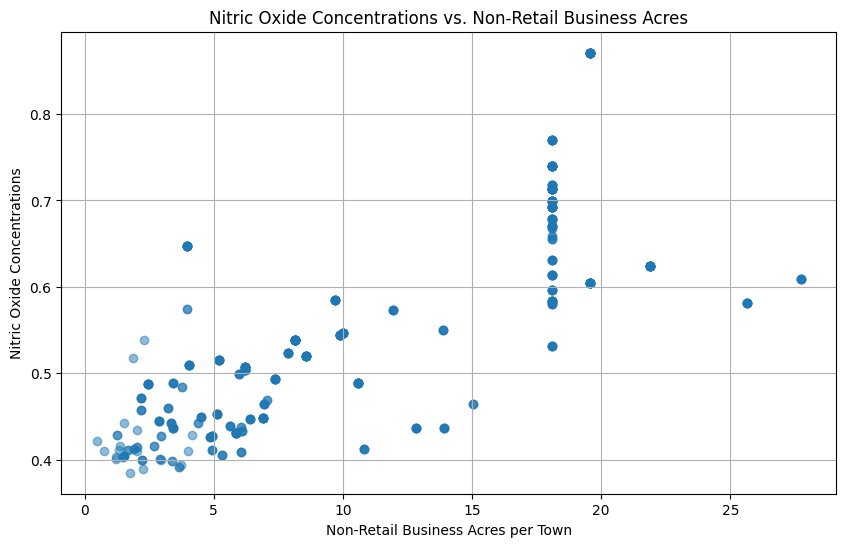

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.5)
plt.title('Nitric Oxide Concentrations vs. Non-Retail Business Acres')
plt.xlabel('Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxide Concentrations')
plt.grid(True)
plt.show()

* There appears to be a positive correlation between nitric oxide concentration and the proportion of non-retail business acres. As the proportion of non-retail business acres increases, the concentration of nitric oxide also tends to increase.

* For areas with a lower proportion of non-retail business acres (0-10%), the nitric oxide concentration generally stays below 0.6 parts per 10 million. For areas with a higher proportion of non-retail business acres (above 15%), there is a noticeable increase in NOX concentration. Several points in this range show NOX levels above 0.6, with some even exceeding 0.8 parts per 10 million.

* There is a dense cluster of data points around 18-20% non-retail business acres with NOX concentrations varying between 0.6 and 0.8. This suggests that certain industrial areas have consistently higher NOX levels potentially due to concentrated industrial activities.

* There are a few outliers with high nitric oxide concentrations at lower proportions of non-retail business acres and vice versa.

* The positive correlation implies that industrial areas contribute significantly to air pollution in terms of nitric oxide. This has implications for urban planning and public health because higher NOX levels are associated with adverse health effects.

### 2.5 Histogram for Pupil-Teacher Ratio

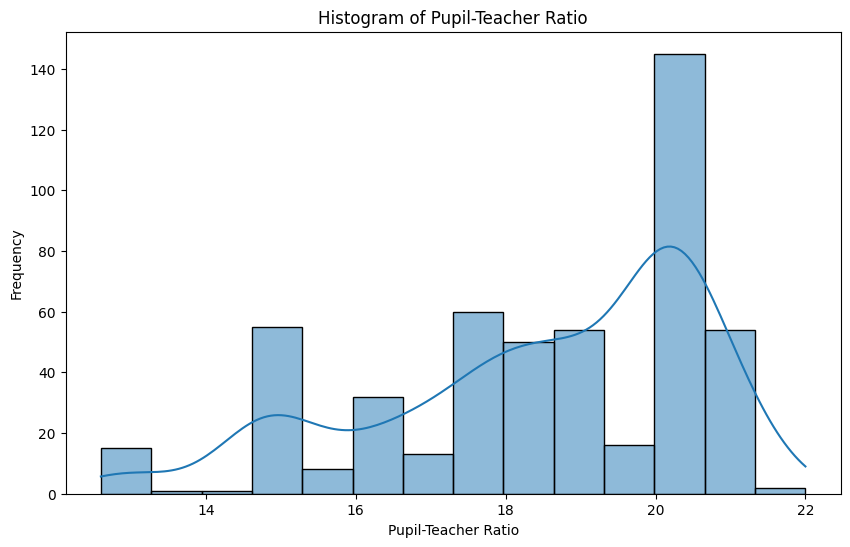

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], kde=True)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

* The histogram shows a right-skewed distribution, with most observations concentrated toward the higher end of the pupil-teacher ratio spectrum.


* The most frequent pupil-teacher ratio is around 20, with over 140 occurrences. This indicates that many areas in Boston have a relatively high number of students per teacher.

* Other common ratios range from 16 to 19, with a notable peak at 18, indicating variability in class sizes across different areas.

* Ratios below 14 are less common, suggesting that smaller class sizes are relatively rare in Boston.

* This can indicate the prevalence of larger class sizes in many areas, indicating potential areas for improvement in education quality. 
    * Areas with lower pupil-teacher ratios generally provide more individualized attention to students this can be an indicator of better education quality.
    * The prevalence of higher ratios (around 20) suggests that many schools might face challenges with larger class sizes impacting the quality of education.  

# Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


- Use α = 0.05


### 3.1 T-test for Independent Samples

**Question:** Is there a significant difference in the median value of houses bounded by the Charles River or not?

**Method:** Perform an independent samples t-test comparing the median value (MEDV) of houses that bound the Charles River (CHAS = 1) and those that do not (CHAS = 0).

**Hypothesis:**

* Null Hypothesis (H0): There is no significant difference in median values of houses bounded by the Charles River.

* Alternative Hypothesis (H1): There is a significant difference in median values of houses bounded by the Charles River.

In [18]:
# T-test for Charles River Variable
from scipy import stats

# Separate data based on CHAS
river_data = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_river_data = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform T-test
t_stat, p_value = stats.ttest_ind(river_data, not_river_data)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")

T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference.


### 3.2 Perform ANOVA for Proportion of Owner-Occupied Units Built Before 1940
**Question:** Is there a difference in median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)?

**Method:** Perform a one-way ANOVA to test if there are differences in MEDV across different age groups.

**Hypothesis:** 

* Null Hypothesis (H0): All groups have the same median value of homes.

* Alternative Hypothesis (H1): At least one group has a different median value.

In [20]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['0-35', '35-70', '70+'])
anova_model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


* The extremely small P-value indicates that there is a significant difference in the median values of houses (MEDV) across the different age groups. The null hypothesis, which states that there are no differences in the means of the groups, can be rejected.

* AGE has an impact on mean prices (MEDV). This result was visible in the boxplot in section IV.3. The test does not say much about the numerous outliers in age group=2 (higher rate of old houses).  Other factors are involved: number of rooms, etc. 

### 3.3 Pearson Correlation for Nitric Oxide and Non-Retail Business Acres

**Question:** Can we conclude that there is no relationship between nitric oxide concentrations and the proportion of non-retail business acres per town?

**Method:** Calculate the Pearson correlation coefficient between nitric oxide concentration (NOX) and the proportion of non-retail business acres (INDUS).

**Hypothesis:**

* Null Hypothesis (H0): There is no correlation between NOX and INDUS.

* Alternative Hypothesis (H1): There is a correlation between NOX and INDUS.

In [21]:
correlation, p_value_corr = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson correlation: {correlation}, p-value: {p_value_corr}")

Pearson correlation: 0.763651446920915, p-value: 7.913361061241532e-98


* The Pearson correlation coefficient of 0.763651446920915 indicates a strong positive linear relationship between nitric oxide concentrations and the proportion of non-retail business acres.

* The p-value of 7.913361061241532e-98 is exceedingly small, much smaller than the common significance threshold of 0.05.

* This extremely low p-value indicates that the observed correlation is highly significant and not due to random chance. 

* So we can reject the null hypothesis

### 3.4 Regression Analysis for Distance to Employment Centers

**Question:** What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes?

**Method:** Perform a linear regression analysis with MEDV as the dependent variable and the weighted distance to employment centers (DIS) as the independent variable.

**Hypothesis:**

* Null Hypothesis (H0): The weighted distance to employment centers has no impact on median home value.

* Alternative Hypothesis (H1): The weighted distance to employment centers impacts the median home value.

In [23]:
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']
regression_model = sm.OLS(y, X).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        17:40:18   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

* I did an OLS regression analysis to see how the distance to the five main job centers in Boston (DIS) affects the median value of owner-occupied homes (MEDV). The R-squared value came out to be 0.062, which means that about 6.2% of the changes in home values can be explained by how far they are from these job centers. This isn't a lot, so it suggests there are other important factors influencing home values.

* The F-statistic was 33.58, and the p-value was super tiny (about 0.0000000121), which means the model itself is statistically significant. Basically, it means that the distance to job centers does have some impact on home values, even if it’s not the whole story.

* Looking at the coefficient for DIS, it was 1.0916 with a p-value of 0.000. This shows a strong positive relationship between distance and home value. In simple terms, for each additional unit of distance from the job centers, the median home value goes up by about $1,092. This was a bit surprising since you might expect homes closer to job centers to be more expensive.

* However the low R-squared value tells us that while distance does matter, there are probably other factors at play when it comes to determining home prices in Boston. Things like neighborhood amenities, school quality, and crime rates could also be important.

## **Project Summary**

In this project, I analyzed various factors affecting the median value of owner-occupied homes (MEDV) in Boston using different statistical methods. Here’s a summary of what I found:

#### **Charles River Effect:**

I performed a T-test to see if there’s a significant difference in home values for houses near the Charles River (CHAS = 1) compared to those that aren’t (CHAS = 0). The results showed a very low p-value (0.0000739), meaning there's a significant difference. Homes near the river have different median values compared to those farther away.
Age of Homes:

Using ANOVA, I checked if the age of homes (AGE) affects their median values. The p-value was extremely small (1.710501e-15), indicating significant differences in home values across different age groups. Newer homes tend to have different median values compared to older ones.

#### **Industrial Activity and Pollution:**

I looked at the relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS) using Pearson correlation. The correlation coefficient was 0.764, with a p-value close to zero (7.913361061241532e-98), showing a strong positive relationship. More industrial activity is associated with higher pollution levels.

#### **Distance to Employment Centers:**

Finally, I ran a regression analysis to see how the distance to Boston's employment centers (DIS) impacts home values. The R-squared value was 0.062, indicating that distance explains about 6.2% of the variation in home values. The regression coefficient for DIS was 1.0916, meaning each additional unit of distance increases home value by about $1,092. This relationship was statistically significant but suggests other factors are also important in determining home prices.

### **Conclusion**

Through these analyses, I found that proximity to the Charles River, the age of homes, industrial activity, and distance to employment centers all significantly affect home values in Boston. While each factor has its impact, the relatively low R-squared values in some models indicate that home values are influenced by a combination of many factors, not just the ones analyzed here. This project helped me understand the complexity of the housing market and the importance of considering multiple variables in real estate analysis.